In [1]:
import tensorflow as tf
import import_ipynb
import Generators
import CNN_Model

In [2]:
# Check if TensorFlow detects a GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {len(gpus)}")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected.")

GPUs detected: 1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Train & Validation data
trainPath = "/Users/aman/Documents/Work/Machine Learning/Rock-Paper-Scissors-Using-ML/Dataset/train"
Datagen = Generators.Generator(vs=0.2, rr=20, wsr=0.2, hsr=0.2, sr=0.2, zr=0.2, hf=True)
train = Generators.dataGenerator(datagen=Datagen, datasetPath=trainPath, shuffle=True, imgSize=(128, 128), batchSize=32, classMode="sparse", sub="training")
validation = Generators.dataGenerator(datagen=Datagen, datasetPath=trainPath, shuffle=True, imgSize=(128, 128), batchSize=32, classMode="sparse", sub="validation")

Found 2043 images belonging to 3 classes.
Found 510 images belonging to 3 classes.


In [4]:
# Test data
testPath = "/Users/aman/Documents/Work/Machine Learning/Rock-Paper-Scissors-Using-ML/Dataset/test"
test = Generators.testGenerator(testPath, imgSize=(128, 128), batchSize=32, classMode="sparse")

Found 372 images belonging to 3 classes.


In [5]:
train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [6]:
# Check input shapes
print("\nTraining")
for x_batch, y_batch in train:
    print(f"Input shape: {x_batch.shape}, Label shape: {y_batch.shape}")
    break

print("\nValidation")
for x_batch, y_batch in validation:
    print(f"Input shape: {x_batch.shape}, Label shape: {y_batch.shape}")
    break

print("\nTesting")
for x_batch, y_batch in test:
    print(f"Input shape: {x_batch.shape}, Label shape: {y_batch.shape}")
    break


Training
Input shape: (32, 128, 128, 3), Label shape: (32,)

Validation
Input shape: (32, 128, 128, 3), Label shape: (32,)

Testing
Input shape: (32, 128, 128, 3), Label shape: (32,)


In [7]:
model = CNN_Model.build_model((128, 128, 3), 3)
model.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-15 19:39:53.315127: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-15 19:39:53.315155: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-15 19:39:53.315162: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-15 19:39:53.315176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-15 19:39:53.315186: I tensorflow/core/common_runtime/pluggable_device

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,179 (9.93 MB)

 Trainable params: 2,602,179 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
modelHistory = CNN_Model.trainModel(model, train, validation, 20, "GPU")

Training on GPU

Epoch 1/20


2025-01-15 19:39:53.952501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/stepep - loss: 1.070

Epoch 1 Metrics: Precision = 0.7431, Recall = 0.6795, F1-Score = 0.6559
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 1.0674 - val_loss: 0.8333 - val_precision: 0.7431 - val_recall: 0.6795 - val_f1_score: 0.6559
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/steptep - loss: 0.49

Epoch 2 Metrics: Precision = 0.4667, Recall = 0.4444, F1-Score = 0.3571
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.4975 - val_loss: 0.9524 - val_precision: 0.4667 - val_recall: 0.4444 - val_f1_score: 0.3571
Epoch 3/20


/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/steptep - loss: 0.37

Epoch 3 Metrics: Precision = 0.7905, Recall = 0.7609, F1-Score = 0.7525
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.3768 - val_loss: 0.6607 - val_precision: 0.7905 - val_recall: 0.7609 - val_f1_score: 0.7525
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/steptep - loss: 0.14

Epoch 4 Metrics: Precision = 0.7212, Recall = 0.5926, F1-Score = 0.5349
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1485 - val_loss: 0.8509 - val_precision: 0.7212 - val_recall: 0.5926 - val_f1_score: 0.5349
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/steptep - loss: 0.19

Epoch 5 Metrics: Precision = 0.8542, Recall = 0.8148, F1-Score = 0.8128
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.1937 - val_loss: 0.4039 - val_precision: 0.8542 - val_recall: 0.8148 - val_f1_score: 0.8128
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/steptep - loss: 0.06

Epoch 6 Metrics: Precision = 0.9030, Recall = 0.9074, F1-Score = 0.9039
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/st

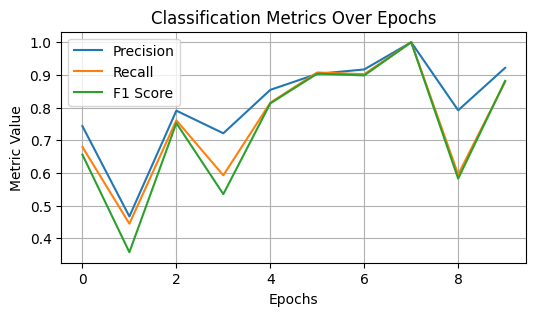

In [9]:
CNN_Model.plotModelHistory(modelHistory)

In [11]:
classificationReport = CNN_Model.evaluateModel(model, test)
print(classificationReport)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       124
        rock       1.00      1.00      1.00       124
    scissors       1.00      1.00      1.00       124

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [12]:
model.save("Models/Model.h5")